In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Practical Deep Learning/Lesson 5: Logistic Regression/Logistic_Regression.txt")
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


Logistic Regression
===============

This is the demo for Logistic Regression




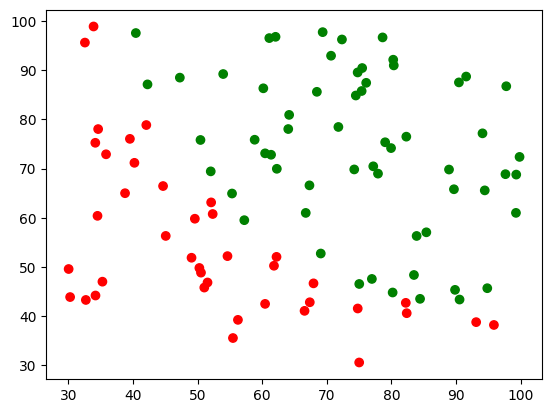

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/Practical Deep Learning/Lesson 5: Logistic Regression/Logistic_Regression.txt", delimiter=',')
colors = colors = ['red' if i == 0 else 'green' for i in data[:, 2]]

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

def update(theta, alpha, grad):
    return theta - alpha * grad

def h(theta, x):
    # Tính giá trị dự đoán (hypothesis) , y mũ
    #YOUR CODE HERE
    return sigmoid(np.dot(x, theta))
    pass

def compute_gradient(theta, x, y):
    # Return gradient and loss
    #YOUR CODE HERE
    #loss = -np.sum(y * np.log(predict(theta, x)) + (1 - y) * np.log(1 - predict(theta, x))) / (len(y))
    gradient = np.dot(x.T, (h(theta, x) - y)) / (len(y))
    return gradient
    pass

def predict(theta, x):
    #Hàm dự đoán sẽ chia lớp thành 2 , giá trị 1/0
    '''Nếu giá trị xác suất lớn hơn hoặc bằng 0.5, kết quả sẽ là True và ngược lại
    astype(int): Phương thức này chuyển đổi mảng Boolean thành mảng số nguyên (integer)
    True - 1, Failed - 0 '''
    # return (h(theta, x) >= 0.5).astype(int)
    return np.round(h(theta, x))

# Tất cả các hàng (:) , các cột từ chỉ số 0 đến chỉ số 2 (không bao gồm 2), nghĩa là cột 0 và cột 1.
x = pad(data[:, 0:2])
# Tất cả các hàng (:) , chỉ lấy cột 2
y = data[:, 2]

alpha = 0.002/len(x)
tolerance = 1E-5
error = 1

theta = np.array([0.0, 0.0, 0.0])
iteration = 0;

while error > tolerance:
    grad = compute_gradient(theta, x, y)

    theta = update(theta, alpha, grad)

    error = alpha * np.amax(np.absolute(grad))
    iteration = iteration + 1
    if iteration % 100000 == 0:
        print("Error ", error)

print(theta)

[-6.77686168e-05  6.08517984e-03  4.57138815e-03]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

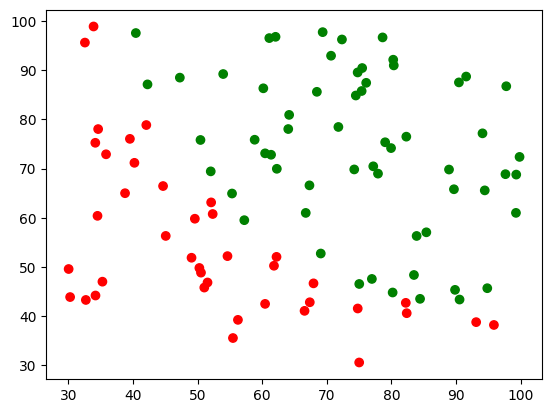

In [ ]:
def compute_y(theta, x):
    #YOUR CODE HERE
    return np.dot(pad(x),theta)
    pass

line_x = np.array([30, 100])

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.plot(line_x, compute_y(theta, line_x), '-')
plt.xlabel('number of cigarettes')
plt.ylabel('number of cups of alcohol')

plt.show()